<a href="https://colab.research.google.com/github/GuoyaoShen/DiatomDL/blob/main/data_generate_allsilicone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This script is for "all silicon terahertz" data

# Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Loading

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import re

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms

In [3]:
path_reflection_dir = '/content/drive/My Drive/BU Class/Research/BioDL_Project/data/all silicon terahertz_325 sets/R_'
path_transmission_dir = '/content/drive/My Drive/BU Class/Research/BioDL_Project/data/all silicon terahertz_325 sets/T_'

NUM_SETSIZE = 13

NUM_PARAM = 8  # num of params in the file

## Reflection data

In [4]:
data_param_R = np.array([]).reshape(0,NUM_PARAM)
data_spectra_R = np.array([]).reshape(0,1001,2)

for idx_file in range(NUM_SETSIZE):
    path_file = path_reflection_dir + str(idx_file+1) + '.txt'

    # read file
    print('========================================= FILE '+str(idx_file)+' =========================================')
    num_combination = 0
    with open(path_file) as f:
        lines=f.readlines()

        spectra_all = np.array([]).reshape(0,1001,2)  # shape for each spectra: [1001,2]
        spectra = np.array([]).reshape(0,2)
        param_all = np.array([]).reshape(0,NUM_PARAM)

        for i, line in enumerate(lines):
            if (i%1004!=0) & (i%1004!=1) & (i%1004!=2): # read spectra data
                line_array = np.fromstring(line, dtype=float, sep=' ')
                spectra = np.vstack((spectra, line_array))

            if i%1004==0:  # every (3+1001) lines, read param title
                param = [float(s) for s in re.findall(r"[-+]?\d*\.\d+|\d+", line)]  # extract the float param
                param = np.array(param)
                idx_pick = [1,2,3,4,6,7,8,9]  # only pick the chosen params
                param = param[idx_pick]
                print(num_combination, param)
                print('------------')
                param_all = np.vstack((param_all, param))
                num_combination += 1

            if i%1004==1003:  # every end of the combination, concat
                # print(num_combination)
                spectra_all = np.concatenate((spectra_all, spectra[np.newaxis, ...]), axis=0)
                spectra = np.array([]).reshape(0,2)
    
    # concat data
    data_param_R = np.concatenate((data_param_R, param_all), axis=0)
    data_spectra_R = np.concatenate((data_spectra_R, spectra_all), axis=0)

========================================= FILE 0 =========================================
0 [ 22.    0.  346.4 200.   10.   61.   30.    0. ]
------------
1 [ 24.    0.  346.4 200.   10.   61.   30.    0. ]
------------
2 [ 26.    0.  346.4 200.   10.   61.   30.    0. ]
------------
3 [ 28.    0.  346.4 200.   10.   61.   30.    0. ]
------------
4 [ 30.    0.  346.4 200.   10.   61.   30.    0. ]
------------
5 [ 32.    0.  346.4 200.   10.   61.   30.    0. ]
------------
6 [ 34.    0.  346.4 200.   10.   61.   30.    0. ]
------------
7 [ 36.    0.  346.4 200.   10.   61.   30.    0. ]
------------
8 [ 38.    0.  346.4 200.   10.   61.   30.    0. ]
------------
9 [ 40.    0.  346.4 200.   10.   61.   30.    0. ]
------------
10 [ 42.    0.  346.4 200.   10.   61.   30.    0. ]
------------
11 [ 44.    0.  346.4 200.   10.   61.   30.    0. ]
------------
12 [ 46.    0.  346.4 200.   10.   61.   30.    0. ]
------------
13 [ 48.    0.  346.4 200.   10.   61.   30.    0. ]
--------

In [5]:
print(data_param_R.shape)
print(data_spectra_R.shape)

(325, 8)
(325, 1001, 2)


## Transmission data

In [6]:
data_param_T = np.array([]).reshape(0,NUM_PARAM)
data_spectra_T = np.array([]).reshape(0,1001,2)

for idx_file in range(NUM_SETSIZE):
    path_file = path_transmission_dir + str(idx_file+1) + '.txt'

    # read file
    print('========================================= FILE '+str(idx_file)+' =========================================')
    num_combination = 0
    with open(path_file) as f:
        lines=f.readlines()

        spectra_all = np.array([]).reshape(0,1001,2)  # shape for each spectra: [1001,2]
        spectra = np.array([]).reshape(0,2)
        param_all = np.array([]).reshape(0,NUM_PARAM)

        for i, line in enumerate(lines):
            if (i%1004!=0) & (i%1004!=1) & (i%1004!=2): # read spectra data
                line_array = np.fromstring(line, dtype=float, sep=' ')
                spectra = np.vstack((spectra, line_array))

            if i%1004==0:  # every (3+1001) lines, read param title
                param = [float(s) for s in re.findall(r"[-+]?\d*\.\d+|\d+", line)]  # extract the float param
                param = np.array(param)
                idx_pick = [1,2,3,4,6,7,8,9]  # only pick the chosen params
                param = param[idx_pick]
                print(num_combination, param)
                print('------------')
                param_all = np.vstack((param_all, param))
                num_combination += 1

            if i%1004==1003:  # every end of the combination, concat
                # print(num_combination)
                spectra_all = np.concatenate((spectra_all, spectra[np.newaxis, ...]), axis=0)
                spectra = np.array([]).reshape(0,2)

    
    # concat data
    data_param_T = np.concatenate((data_param_T, param_all), axis=0)
    data_spectra_T = np.concatenate((data_spectra_T, spectra_all), axis=0)

========================================= FILE 0 =========================================
0 [ 22.    0.  346.4 200.   10.   61.   30.    0. ]
------------
1 [ 24.    0.  346.4 200.   10.   61.   30.    0. ]
------------
2 [ 26.    0.  346.4 200.   10.   61.   30.    0. ]
------------
3 [ 28.    0.  346.4 200.   10.   61.   30.    0. ]
------------
4 [ 30.    0.  346.4 200.   10.   61.   30.    0. ]
------------
5 [ 32.    0.  346.4 200.   10.   61.   30.    0. ]
------------
6 [ 34.    0.  346.4 200.   10.   61.   30.    0. ]
------------
7 [ 36.    0.  346.4 200.   10.   61.   30.    0. ]
------------
8 [ 38.    0.  346.4 200.   10.   61.   30.    0. ]
------------
9 [ 40.    0.  346.4 200.   10.   61.   30.    0. ]
------------
10 [ 42.    0.  346.4 200.   10.   61.   30.    0. ]
------------
11 [ 44.    0.  346.4 200.   10.   61.   30.    0. ]
------------
12 [ 46.    0.  346.4 200.   10.   61.   30.    0. ]
------------
13 [ 48.    0.  346.4 200.   10.   61.   30.    0. ]
--------

In [7]:
print(data_param_T.shape)
print(data_spectra_T.shape)

(325, 8)
(325, 1001, 2)


In [8]:
# double check param array

print(np.any([[True, False], [False, False]]))
print(np.any([[False, False], [False, False]]))

print(np.any(data_param_T - data_param_R))  # if this is false, then correct

True
False
False


# Check Params Range

In [29]:
# d = data_param_T[...,1]
# p = data_param_T[...,3]
# t_top = data_param_T[...,8]

# print('d min:', min(d))
# print('d max:', max(d))
# print('--------------------')
# print('p min:', min(p))
# print('p max:', max(p))
# print('--------------------')
# print('t_top min:', min(t_top))
# print('t_top max:', max(t_top))

# Save Data

In [61]:
path_dataset = '/content/drive/My Drive/BU Class/Research/BioDL_Project/data/allsilicone_325.npz'

np.savez(path_dataset, param=data_param_T, R=data_spectra_R, T=data_spectra_T)

print('DATASET SAVED')

DATASET SAVED


In [62]:
data = np.load(path_dataset)
print(data['param'].shape)
print(data['R'].shape)
print(data['T'].shape)
print(data['R'][0])
print(data['T'][0])

(325, 8)
(325, 1001, 2)
(325, 1001, 2)
[[0.5        0.71854585]
 [0.501      0.71784703]
 [0.502      0.71713872]
 ...
 [1.498      0.17813274]
 [1.499      0.17870082]
 [1.5        0.17950486]]
[[0.5        0.54261804]
 [0.501      0.54322185]
 [0.502      0.54383024]
 ...
 [1.498      0.76145981]
 [1.499      0.7619166 ]
 [1.5        0.76231397]]


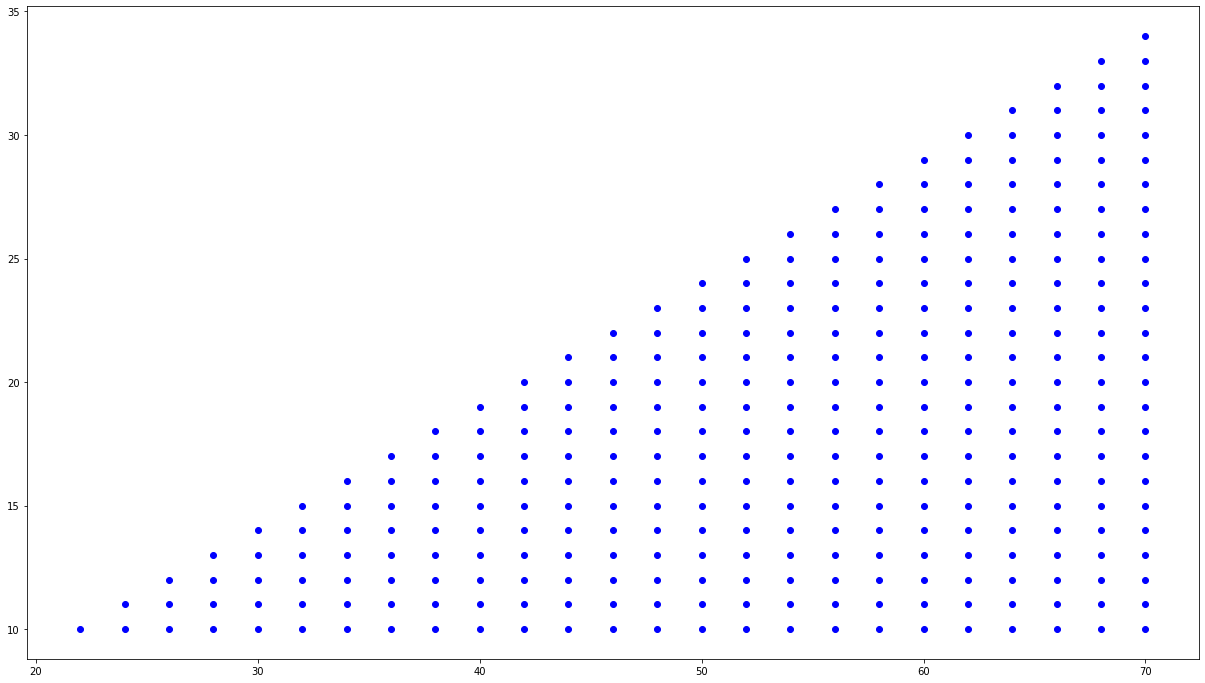

In [10]:
p = data_param_T[:,0]
r = data_param_T[:,4]

plt.figure(1, figsize=(21,12))
plt.scatter(p, r, c='b')